**What exactly is prostate cancer?** <br>
There's nothing more dangerous to a man than prostate cancer, which develops in the gland responsible for nourishing and transporting sperm, which is located just below the prostate bone.

One of the most frequent cancers found in males is prostate cancer. In most cases, prostate cancer develops slowly and locally, where it poses little threat. While some forms of prostate cancer develop slowly and may require little or no therapy, others are aggressive and can spread fast.

In [10]:
install.packages("caTools")

Installing package into 'C:/Users/Light_House/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Light_House\AppData\Local\Temp\RtmpIV4E1E\downloaded_packages


library(caTools)
library(ggplot2)
library(tidyverse)

In [20]:
df <- read.delim("pcancer(2).data", header=TRUE)

In [3]:
head(df)

,X,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<lgl>
1,1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829,TRUE
2,2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
3,3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189,TRUE
4,4,-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
5,5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636,TRUE
6,6,-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678,TRUE


In [4]:
summary(df)

       X          lcavol           lweight           age       
 Min.   : 1   Min.   :-1.3471   Min.   :2.375   Min.   :41.00  
 1st Qu.:25   1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00  
 Median :49   Median : 1.4469   Median :3.623   Median :65.00  
 Mean   :49   Mean   : 1.3500   Mean   :3.629   Mean   :63.87  
 3rd Qu.:73   3rd Qu.: 2.1270   3rd Qu.:3.876   3rd Qu.:68.00  
 Max.   :97   Max.   : 3.8210   Max.   :4.780   Max.   :79.00  
      lbph              svi              lcp             gleason     
 Min.   :-1.3863   Min.   :0.0000   Min.   :-1.3863   Min.   :6.000  
 1st Qu.:-1.3863   1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000  
 Median : 0.3001   Median :0.0000   Median :-0.7985   Median :7.000  
 Mean   : 0.1004   Mean   :0.2165   Mean   :-0.1794   Mean   :6.753  
 3rd Qu.: 1.5581   3rd Qu.:0.0000   3rd Qu.: 1.1787   3rd Qu.:7.000  
 Max.   : 2.3263   Max.   :1.0000   Max.   : 2.9042   Max.   :9.000  
     pgg45             lpsa           train        
 Min.   : 

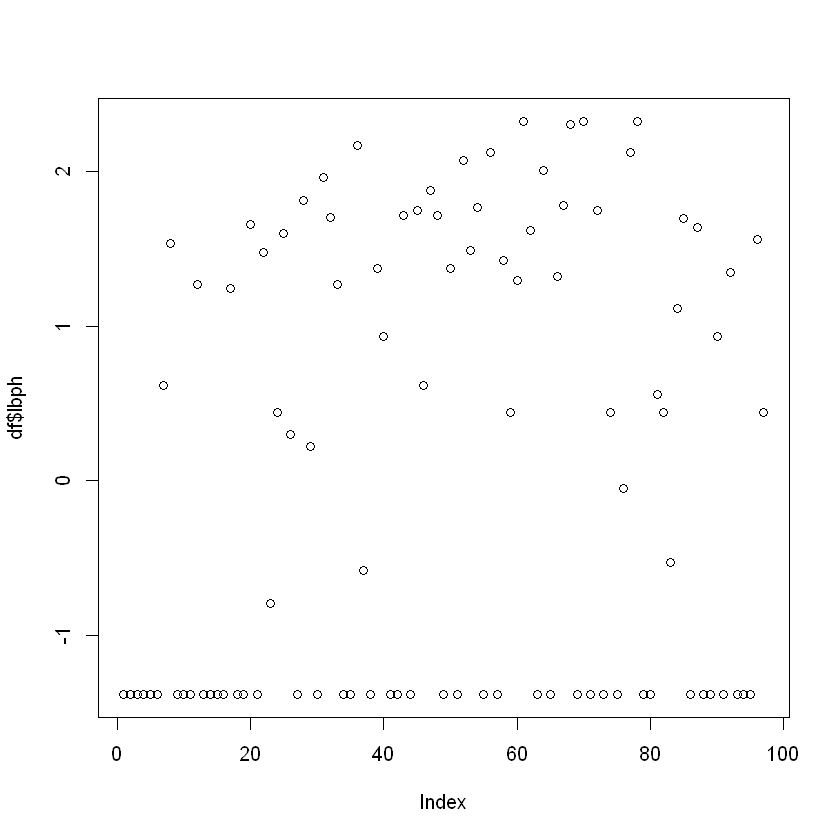

In [5]:
plot(df$lbph)

In [7]:
sum(df$train==TRUE)

[1] 67

There are altogether 67 training data in the dataset.

In [22]:
cor(sqrt(df$lcavol), sqrt(df$lbph))

Warning message in sqrt(df$lbph):
"NaNs produced"
Warning message in sqrt(df$lcavol):
"NaNs produced"


[1] NA

Warning message in sqrt(lbph):
"NaNs produced"
Warning message in sqrt(lcavol):
"NaNs produced"
Warning message in sqrt(lbph):
"NaNs produced"
Warning message in sqrt(lcavol):
"NaNs produced"
Warning message in sqrt(lbph):
"NaNs produced"
Warning message in sqrt(lcavol):
"NaNs produced"
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 50 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 50 rows containing missing values (geom_point)."


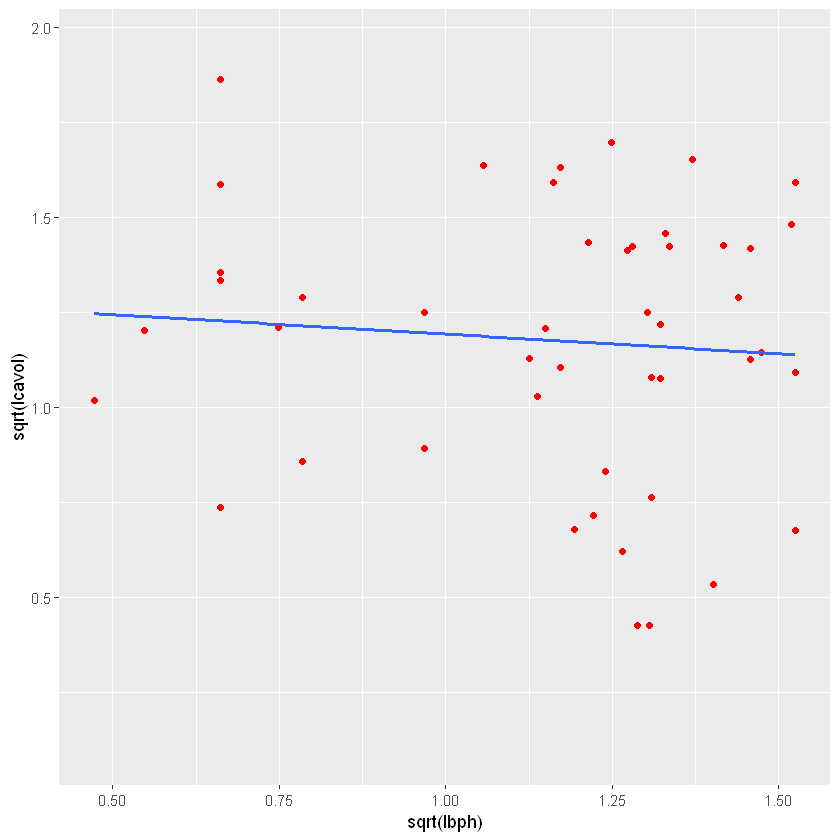

In [18]:
df %>% ggplot(aes(x = sqrt(lbph), y = sqrt(lcavol))) + geom_point(colour = "red") + geom_smooth(method = "lm", fill = NA)

In [28]:
# Reorder the variables for better visualization. The following pairs plot should look similar to the pairs plot in ESL page 3.

df=df[ ,c('lpsa','lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45')]

train_data=df[ ,c('lpsa','lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45')]

test_data=df[ ,c('lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45')]

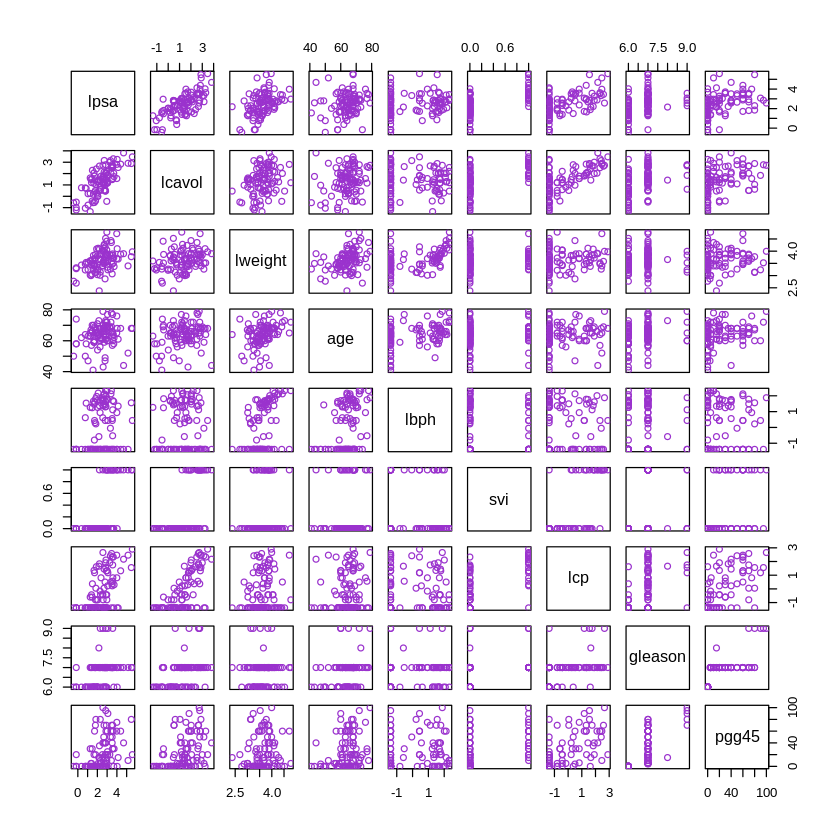

In [29]:
pairs(df,col="darkorchid3")

In [30]:
prostate_linear=lm(lpsa~lcavol+lweight+age+lbph+svi+lcp+gleason+pgg45,data=train_data)

summary(prostate_linear)


Call:
lm(formula = lpsa ~ lcavol + lweight + age + lbph + svi + lcp + 
    gleason + pgg45, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.76644 -0.35510 -0.00328  0.38087  1.55770 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.181561   1.320568   0.137  0.89096    
lcavol       0.564341   0.087833   6.425 6.55e-09 ***
lweight      0.622020   0.200897   3.096  0.00263 ** 
age         -0.021248   0.011084  -1.917  0.05848 .  
lbph         0.096713   0.057913   1.670  0.09848 .  
svi          0.761673   0.241176   3.158  0.00218 ** 
lcp         -0.106051   0.089868  -1.180  0.24115    
gleason      0.049228   0.155341   0.317  0.75207    
pgg45        0.004458   0.004365   1.021  0.31000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6995 on 88 degrees of freedom
Multiple R-squared:  0.6634,	Adjusted R-squared:  0.6328 
F-statistic: 21.68 on 8 and 88 DF,  p-value: <